In [1]:
import numpy as np
import scipy
import scipy.io
import matplotlib.pyplot as plt
import libpsf

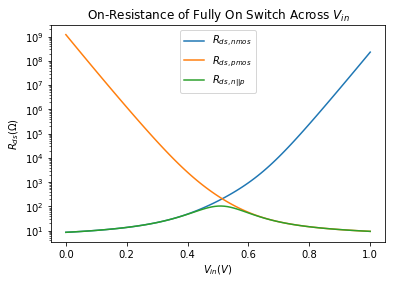

In [13]:
dc_sim = libpsf.PSFDataSet("problem.raw/dc.dc")
vin = dc_sim.get_signal("n1")
n_rds = 1 / dc_sim.get_signal("mn:gds")
p_rds = 1 / dc_sim.get_signal("mp:gds")
rds = [(n_rds[i]*p_rds[i]) / (n_rds[i] + p_rds[i]) for i in range(len(n_rds))]
plt.semilogy(vin, n_rds)
plt.semilogy(vin, p_rds)
plt.semilogy(vin, rds)
plt.xlabel('$V_{in} (V)$')
plt.ylabel('$R_{ds} (\Omega)$')
plt.title('On-Resistance of Fully On Switch Across $V_{in}$')
plt.legend(['$R_{ds,nmos}$', '$R_{ds,pmos}$', '$R_{ds,n||p}$'])
plt.savefig('figs/partb.pdf')

16384


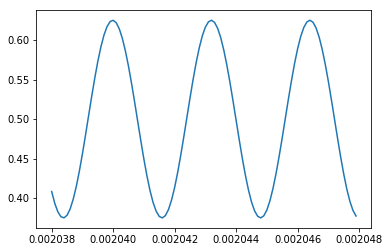

In [27]:
tran_sim = libpsf.PSFDataSet("problem.raw/sweep-000_tran.tran.tran")
t = tran_sim.get_sweep_values()[-16384:]
vout = tran_sim.get_signal("n2")[-16384:]
print(len(vout))
plt.plot(t[-100:], vout[-100:])

In [45]:
hd3 = []
for sweep in ['000', '001', '002', '003']:
    tran_sim = libpsf.PSFDataSet("problem.raw/sweep-" + sweep + "_tran.tran.tran")
    t = tran_sim.get_sweep_values()[-16384:]
    vout = tran_sim.get_signal("n2")[-16384:]
    fs = 10e6
    raw_fft = np.abs(np.fft.fft(vout))
    N = len(t)
    raw_fft = raw_fft[:int(N/2)]
    fft = 20*np.log10(2*raw_fft/N)
    f = np.array(range(0, int(N/2))) / N * fs / 1e6
    part = np.argpartition(raw_fft, -2)[-2:]
    sig_amp = raw_fft[part[0]]
    harm_amp = raw_fft[part[0]*3]
    hd3.append(harm_amp/sig_amp)
    print(harm_amp/sig_amp)

0.0003723762059118149
0.00018414631452965774
9.149519997296172e-05
4.5360173952945065e-05


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


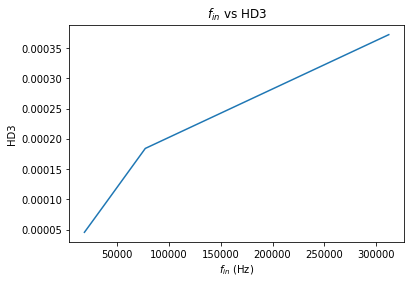

In [48]:
in_freq = [p/100e-9/16384 for p in [511, 127, 63, 31]]
plt.plot(in_freq, hd3)
plt.xlabel('$f_{in}$ (Hz)')
plt.ylabel('HD3')
plt.title('$f_{in}$ vs HD3')
plt.savefig('figs/partd.pdf')

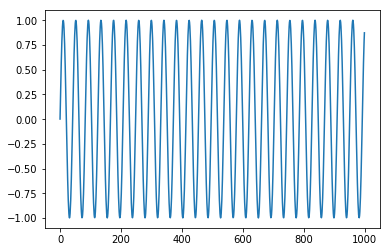

In [3]:
data = scipy.io.loadmat('hw2_p1_data.mat')
data = data['adc_data']
data = np.array(data).T[0]
plt.plot(data[:1000])

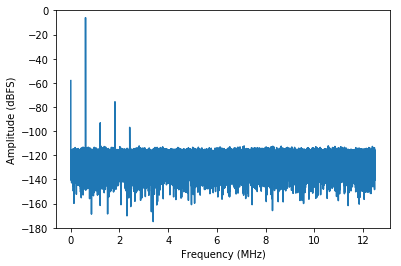

In [4]:
fs = 25e6
FS = 1 - (-1)
raw_fft = np.abs(np.fft.fft(data))
N = len(data)
raw_fft = raw_fft[:int(N/2)]
fft = 20*np.log10(2*raw_fft/N/FS)
f = np.array(range(0, int(N/2))) / N * fs / 1e6
plt.plot(f, fft)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dBFS)')
plt.ylim([-180, 0])
plt.savefig('figs/problem1a.pdf')

In [5]:
maxbin = np.argmax(fft)
maxfreq = f[maxbin]
print(maxbin, maxfreq)

3171 0.6048202514648438


In [6]:
# SNR, noise excludes DC, signal, 2-7th harmonics
sigpower = raw_fft[maxbin]**2
print(sigpower)
noisepower = np.sum([0 if (i % maxbin == 0 and i <= maxbin*7) else raw_fft[i]**2 for i in range(len(raw_fft))])
print(noisepower)
snr = (sigpower / noisepower)
print(snr)
print(10*np.log10(snr))

4286484481.497229
688.0611342413415
6229801.783853874
67.944742287542


In [7]:
# SNDR, noise excludes DC and signal, but includes harmonics
sigpower = raw_fft[maxbin]**2
print(sigpower)
noisepower = np.sum([0 if (i == 0 or i == maxbin) else raw_fft[i]**2 for i in range(len(raw_fft))])
print(noisepower)
sndr = (sigpower / noisepower)
print(sndr)
print(10*np.log10(sndr))

4286484481.497229
1165.7318264808437
3677075.9656081744
65.65502602157046


In [8]:
# THD, distortion power over signal power
sigpower = raw_fft[maxbin]**2
print(sigpower)
distpower = sum(raw_fft[np.array([2,3,4,5,6,7])*maxbin]**2)
print(distpower)
thd = (distpower / sigpower)
print(thd)
print(10*np.log10(thd))

4286484481.497229
477.67069223950205
1.1143646834635363e-07
-69.5297266006215


In [9]:
# SFDR, max spur power over signal power
sigpower = raw_fft[maxbin]**2
print(sigpower)
spurpower = raw_fft[maxbin*3]**2
print(spurpower)
sfdr = (sigpower / spurpower)
print(sfdr)
print(10*np.log10(sfdr))

4286484481.497229
465.5959474179288
9206447.146434437
69.6409206424828


In [33]:
# Problem 2 sweep
ku = 0.03
inl_a_unit = lambda B: ((2.6/2) * (ku * np.sqrt(2**B)) / 2)**2
dnl_a_unit = lambda Bb: ((2.6/0.5) * ku * np.sqrt(2**(Bb+1) - 1))**2
for Bb in range(12):
    a_unit_1 = inl_a_unit(12)
    a_unit_2 = dnl_a_unit(Bb)
    a_unit = max(a_unit_1, a_unit_2)
    area = (2**(12-Bb))*200 + (2**12)*a_unit
    print(Bb, area, a_unit)

0 825579.536384 1.557504
1 415979.536384 1.557504
2 211179.536384 1.557504
3 108779.536384 1.557504
4 57579.536384 1.557504
5 31979.536384 1.557504
6 25459.392512 3.0906719999999996
7 31818.46528 6.20568
8 54136.61081599999 12.435695999999998
9 103572.90188800002 24.895728000000005
10 204845.48403199998 49.815791999999995
11 408590.64832 99.65592


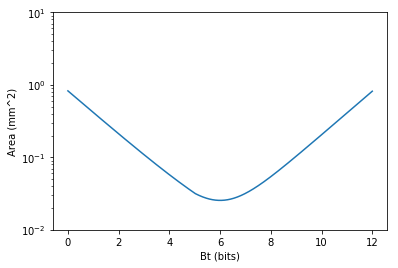

In [46]:
Bt_vals = []
area_vals = []
for Bb in np.linspace(0, 12, 500):
    a_unit_1 = inl_a_unit(12)
    a_unit_2 = dnl_a_unit(Bb)
    a_unit = max(a_unit_1, a_unit_2)
    area = (2**(12-Bb))*200 + (2**12)*a_unit
    area_vals.append(area/1e6)
    Bt_vals.append(12-Bb)

plt.semilogy(Bb_vals, area_vals)
plt.ylim([10e-3, 10e0])
plt.xlabel('Bt (bits)')
plt.ylabel('Area (mm^2)')
plt.savefig('figs/problem2.pdf')